In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import classification_report

In [3]:
cols=["user_id","item_id","rating","timestamp"]
df=pd.read_csv("ratings.csv",names=cols)
df.head()

,user_id,item_id,rating,timestamp
0,user_id,item_id,rating,timestamp
1,0,50,5,881250949
2,0,172,5,881250949
3,0,133,1,881250949
4,196,242,3,881250949


In [4]:
ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")


this is the cols in ratings.csv
#understanding


In [6]:
print(ratings.columns)


Index(['user_id', 'item_id', 'rating', 'timestamp'], dtype='object')


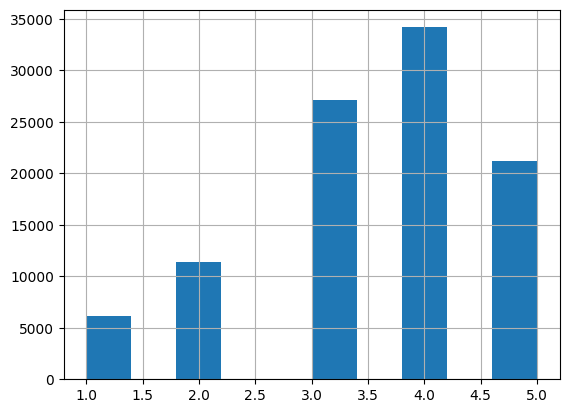

In [37]:
ratings['rating'].hist(bins=10)
plt.show()


In [8]:
user_movie_matrix = ratings.pivot(index='user_id', columns='item_id', values='rating')

handling missing values


In [9]:
user_movie_filled = user_movie_matrix.fillna(0)

item-based KNN Model


In [31]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [32]:
user_item_matrix_norm = user_item_matrix.sub(user_item_matrix.mean(axis=1), axis=0).fillna(0)

In [33]:
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(user_item_matrix_norm.T)

NearestNeighbors(algorithm='brute', metric='cosine')

In [34]:
def recommend_movies(user_id, k=5):
    if user_id not in user_item_matrix_norm.index:
        return []

    user_ratings = user_item_matrix_norm.loc[user_id]
    watched_items = user_ratings[user_ratings > 0].index.tolist()
    recommended = set()

    for item in watched_items:
        if item in user_item_matrix_norm.columns:
            item_idx = list(user_item_matrix_norm.columns).index(item)

            # ✅ Use the globally defined knn
            distances, neighbors = knn.kneighbors(
                user_item_matrix_norm.T.iloc[item_idx].values.reshape(1, -1),
                n_neighbors=k+1
            )

            for n in neighbors[0]:
                candidate = user_item_matrix_norm.columns[n]
                if candidate not in watched_items:
                    recommended.add(candidate)

        if len(recommended) >= k:
            break

    return list(recommended)[:k]

In [35]:
def precision_recall_at_k(user_id, k=5):
    test_items = test_ratings[test_ratings["user_id"] == user_id]["item_id"].tolist()
    if not test_items:
        return None

    recommended = recommend_movies(user_id, k)
    if not recommended:
        return None

    hits = set(test_items) & set(recommended)

    precision = len(hits) / len(recommended) if recommended else 0
    recall = len(hits) / len(test_items) if test_items else 0
    return precision, recall

In [36]:
for k in [5, 10, 20]:
    precisions, recalls = [], []
    for u in test_ratings["user_id"].unique():
        pr = precision_recall_at_k(u, k=k)
        if pr:
            precisions.append(pr[0])
            recalls.append(pr[1])

    print(f"Results for k={k}")
    print("Avg Precision@{}:".format(k), np.mean(precisions))
    print("Avg Recall@{}:".format(k), np.mean(recalls))
    print("-"*40)

Results for k=5
Avg Precision@5: 0.21930010604453873
Avg Recall@5: 0.07167001508326798
----------------------------------------
Results for k=10
Avg Precision@10: 0.18971367974549314
Avg Recall@10: 0.11727753260410047
----------------------------------------
Results for k=20
Avg Precision@20: 0.15943796394485688
Avg Recall@20: 0.19040287144778167
----------------------------------------
